# Python codes for [Introduction to Computional Stochastic PDEs, CUP 2014](http://www.cambridge.org/gb/academic/subjects/mathematics/differential-and-integral-equations-dynamical-systems-and-co/introduction-computational-stochastic-pdes?format=PB&isbn=9780521728522)

Written by [T. Shardlow](http://people.bath.ac.uk/tjs42/) Dec 2015
# Chapter 1



Python has two major versions widely in use, versions 2 and 3. These codes were developed with Python 2.7 with future syntax changes "imported", as achieved in the next few lines. The advantage of making these imports is the code is more likely to run on both Python 2.7 and Python 3.

In [1]:

from __future__ import (absolute_import, division,
                        print_function, unicode_literals)

In particular, this makes the division and print command work differently.


In [2]:
print(1/2==0.5) # traditional Python 2 treats 1/2 as integer division (returning 0) and 1.0/2.0 as floating-point division

True


In [3]:
from builtins import (bytes, dict, int, list, object, range, str,
                      ascii, chr, hex, input, next, oct, open,
                      pow, round, super, filter, map, zip)
from future.builtins.disabled import (apply, cmp, coerce, execfile,
                                      file, long, raw_input, reduce, reload,
                                      unicode, xrange, StandardError)
#
import sys
#

Here, we have finished the import of Python 3 modules. Now, lets set up some mathematics. To function in a way similar to MATLAB, Python requires a variety of modules are imported.

In [4]:
from math import *
print(pi, gamma(5), exp(1))

3.14159265359 24.0 2.71828182846


The constant pi and gamma and exponential functions are defined in a module called `math`. Usually, these would be called with `math.pi`, `math.gamma`, `math.exp`, but here we use `import *` to avoid having to use `math`.

For vectors, matrices, tensors, we require Numpy and we `import numpy as np`, so we use the prefix np. when calling Numpy functions. We also import Matplotlib for plotting.

In [5]:
# Numpy
import numpy as np
from numpy import matlib
# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
x=np.array([10,-20]) # define a one-dimensional Numpy array (vector) 
A=np.array([[1,2],[3,4]]) # define a two-dimensional Numpy (matrix) 
print("x=",x,"\nA=",A)

x= [ 10 -20] 
A= [[1 2]
 [3 4]]


Numpy arrays are different MATLAB matrices in important ways: MATLAB vectors are indexed starting at 1, while Numpy arrays are indexed starting at 0


In [7]:
print (A[0,0],A[1,0])
print (A[0,1],A[1,1])
print (np.arange(5)) # range starts at 0 and last entry excluded (equivalent to MATLAB 0:4)

1 3
2 4
[0 1 2 3 4]


Also, A\*x in MATLAB is the matrix-vector product, while in Numpy it is an element-wise product. The command `np.dot(A,x)` or equivalently `A.dot(x)` does matrix multiply. Notice that `x`, as a one-dimensional array, is not a column vector and the `dot` is still well-defined.

In [8]:
print('A*x=',A*x)
print('A.dot(x)=',A.dot(x))

A*x= [[ 10 -40]
 [ 30 -80]]
A.dot(x)= [-30 -50]


For element-wise evaluation of exp and stacking vectors:

In [9]:
print(np.exp(x))
print(np.hstack([x,x]))
print(np.vstack([x,x]))

[  2.20264658e+04   2.06115362e-09]
[ 10 -20  10 -20]
[[ 10 -20]
 [ 10 -20]]


A nice reference for learning Numpy commands from their MATLAB equivalents is [here](http://mathesaurus.sourceforge.net/matlab-numpy.html).

Now, here's our first function. 

In [10]:
fft=np.fft.fft # define alias for fft
def get_coeffs(u,a,b):
    """ 
    A1.1 Page 32. 
    """
    J=u.size - 1;    h=(b - a) / J
    u1=np.hstack(( (u[0] + u[-1 ]) / 2,  u[1:-1]) )
    Uk=(h / (b - a))*np.exp( (- 2 * pi * 1j * a / (b - a) )
                             * np.arange(J) )*fft(u1)
    assert (J % 2 == 0) # J must be even
    nu= ((2. * pi / (b - a))
         * np.hstack((np.arange(1+J/ 2), np.arange(- J / 2 + 1,0)))) 
    return Uk, nu    

In [11]:
u=np.array([2,5,9,0,2])
a=0; b=1;
Uk,nu=get_coeffs(u,a,b)
print(Uk,nu)

[ 4.00+0.j   -1.75-1.25j  1.50+0.j   -1.75+1.25j] [  0.           6.28318531  12.56637061  -6.28318531]


The next routine approximates the $L^2$ and $H^1$ norm of a real-valued function $f$ on the interval $[a,b]$ using a $J$-term expansion.

In [12]:
 
def get_norm(fhandle,a,b,J):
    """
    A1.2. Page 33
    """
    grid=np.linspace(a,b, J+1)  
    u=fhandle(grid)
    Uk,nu=get_coeffs(u,a,b)
    l2_norm=sqrt(b-a) * np.linalg.norm(Uk)
    dUk=nu*Uk # element-wise multiplication
    h1_norm=np.linalg.norm([l2_norm, sqrt(b - a) * np.linalg.norm(dUk)])
    return l2_norm, h1_norm

We set up two test functions.

In [13]:
def f_u1(x):
    return (x*(x-1))**2

def f_u2(x):
    return np.cos(x*pi/2)

The Python module for symbolic mathematics is called Sympy. Here, we import Sympy and use it to evaluate the norms of the two test functions.

In [14]:
import sympy as sp
def get_symbolic(u,x,a,b):
    int1=sp.Integral(u(x)*u(x),(x,a,b))
    du=lambda x:sp.diff(u(x),x)
    int2=sp.Integral(du(x)*du(x),(x,a,b))
    l2_norm=sqrt(int1.evalf())
    h1_semi_norm=sqrt(int2.evalf())
    h1_norm=np.linalg.norm((l2_norm,h1_semi_norm))
    return l2_norm,h1_norm
    
def sp_u1(a,b):
    x=sp.symbols('x')
    u=lambda x:((x*(x-1))**2)
    l2_norm,h1_norm=get_symbolic(u,x,a,b)
    return l2_norm,h1_norm

def sp_u2(a,b):
    x=sp.symbols('x')
    u=lambda x:(sp.cos(x*pi/2))
    l2_norm,h1_norm=get_symbolic(u,x,a,b)
    return l2_norm,h1_norm
print('u1',sp_u1(0,1),'\nu2', sp_u2(0,1))

u1 (0.03984095364447979, 0.14364860122855577) 
u2 (0.7071067811865476, 1.3167006304153461)


Let's see how good `get_norm` is at evaluating the norms. 

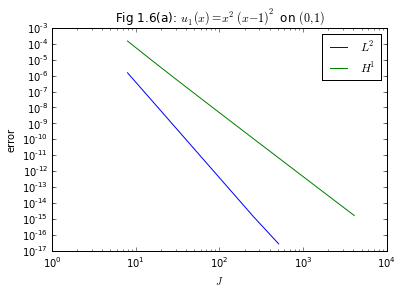

In [15]:
N=10; J=np.zeros(N,dtype='float64');
l2_norm=np.empty_like(J);        h1_norm=np.empty_like(J);    
a=0;    b=1; # domain
for j in range(10):
    N=int(pow(2,(j+3))); J[j]=N; 
    l2_norm[j],h1_norm[j]=get_norm(f_u1,a,b,N)
# get symbolic values
[l2_norm_sym, h1_norm_sym]=sp_u1(a,b)
# computer errors
el2=abs(l2_norm-l2_norm_sym)
ehs=abs(h1_norm-h1_norm_sym)
# plotting
l1,=plt.loglog(J,el2,label='$L^2$')
l2,=plt.loglog(J,ehs,label='$H^1$')
s=plt.xlabel('$J$')
s=plt.ylabel('error')
s=plt.title('Fig 1.6(a): $u_1(x)=x^2(x-1)^2$ on $(0,1)$')
s=plt.legend(handles=[l1,l2])

Now, try the second test function and notice a very different behaviour for the $H^1$ norm.

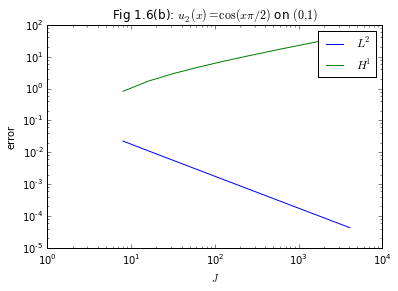

In [16]:
for j in range(10):
    N=int(pow(2,(j+3))); J[j]=N; 
    l2_norm[j],h1_norm[j]=get_norm(f_u2,a,b,N)
# get symbolic values
[l2_norm_sym, h1_norm_sym]=sp_u2(a,b)
# computer errors
el2=abs(l2_norm-l2_norm_sym)
ehs=abs(h1_norm-h1_norm_sym)
# plotting
l1,=plt.loglog(J,el2,label='$L^2$')
l2,=plt.loglog(J,ehs,label='$H^1$')
s=plt.xlabel('$J$')
s=plt.ylabel('error')
s=plt.title('Fig 1.6(b): $u_2(x)=\cos(x\pi/2)$ on $(0,1)$')
s=plt.legend(handles=[l1,l2])